In [1]:
%matplotlib notebook

# Dependencies
#import json
#import pprint
#import requests
#import sys
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import gmaps


#api keys
#from config_api import GEOCODE_API_KEY, YELP_API_KEY
#gmaps.configure(api_key=GEOCODE_API_KEY)

#Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#time manipulations
from datetime import datetime, timedelta

In [2]:
restaurant_data = pd.read_csv("uci_yelp_businesses.csv")
restaurant_data

,Unnamed: 0,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
0,0,0,Ut9709JWjLlx9CYyTjYYKg,Thai Style,33.640992,-117.855753,0.66,1062,$$,2,4,4.5,Thai,Food Stands,5171 California Ave,Irvine,CA,92617
1,1,1,TJljvcQrbgaHyrWRTJDSJA,Slapfish,33.649810,-117.838780,0.72,1166,$$,2,631,4.0,Seafood,Fish & Chips,4249 Campus Dr,Irvine,CA,92612
2,2,2,z6ZyXlSfhftN-h7FfAJo6Q,Asian Box,33.648806,-117.832066,0.91,1461,$,1,286,4.0,Asian Fusion,Vegan,4503 Campus Dr,Irvine,CA,92612
3,3,3,lzx8_1F8TqC9y8L3ElRifg,Hen House Grill,33.649303,-117.832297,0.92,1480,$$,2,747,4.0,Persian/Iranian,Mediterranean,4515 Campus Dr,Irvine,CA,92612
4,4,4,RcWSCtCaDcn9FPZwM0AQrg,Spoleto,33.651059,-117.839014,0.79,1272,$$,2,280,4.0,Italian,Salad,4175 Campus Dr,Irvine,CA,92612
5,5,5,pm1SGfjnSDIDw-1W1XbCSQ,Eureka!,33.650563,-117.839237,0.75,1213,$$,2,800,3.5,American (New),Bars,4143 Campus Dr,Irvine,CA,92612
6,6,6,jTyfj3e8PIkc4KTVh3sAqw,Mendocino Farms,33.650802,-117.839104,0.77,1242,$$,2,479,4.0,Sandwiches,Salad,4187 Campus Dr,Irvine,CA,92612
7,7,7,QzJxZ67PVrqy6Z_5gKfxyw,Le Diplomate Cafe,33.649141,-117.839278,0.75,1210,$,1,1713,4.5,Bakeries,Sandwiches,4237 Campus Dr,Irvine,CA,92612
8,8,8,tKKPXIpijBNRqHz90UX5JA,Temakira,33.650506,-117.838217,0.78,1247,$,1,94,3.5,Sushi Bars,Japanese,4237 Campus Dr,Irvine,CA,92612
9,9,9,I5hqwi5SRlFmdam78sa2HA,Taco Rosa,33.627031,-117.849114,0.97,1562,$$,2,439,3.5,Mexican,Beer Bar,2632 San Miguel Dr,Newport Beach,CA,92660


In [4]:
#Fields to extract - review rating, type
#rating_data = restaurant_data[["name", "review rating"]]
#rating_data
#result = df.sort(['A', 'B'], ascending=[1, 0])
#typrate_sorted = restaurant_data.sort_values(["review rating", "type"],ascending=False)
least_rating = restaurant_data.sort_values(["review rating"])
least_rated= least_rating.head(10)
least_rated

,Unnamed: 0,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
42,42,44,hiczRBTNxzPitF1Hzn1-mQ,Panda Express,33.649199,-117.842563,0.61,980,$,1,39,2.5,Fast Food,Chinese,A232 Student Ctr,Irvine,CA,92697
38,38,40,sTSi1EgTj8WFBz0Bv66Zbw,Taco Bell,33.650948,-117.840874,0.75,1204,$,1,108,2.5,Mexican,Fast Food,4101 Campus Drive,Irvine,CA,92612
25,25,25,95EO0b9QN_fxElBIR1lUUw,Ding's Garden,33.648768,-117.831595,0.96,1541,$,1,48,2.5,Taiwanese,Cafes,4535 Campus Dr,Irvine,CA,92612
24,24,24,bhNBmYIZppxfIw0pUnEtTw,Chipotle Mexican Grill,33.649593,-117.839315,0.69,1111,$,1,161,2.5,Mexican,Fast Food,4255 Campus Dr,Irvine,CA,92612
23,23,23,Q30Zh4ivr1b4mXrLTyLvDA,ADYA,33.650545,-117.837922,0.79,1263,$$,2,112,3.0,Indian,Cooking Classes,4213 Campus Dr,Irvine,CA,92612
43,43,45,cJ3Ql5pI7cqRkKFHUggVOw,Pippin Commons,33.644768,-117.836900,0.52,833,$,1,46,3.0,Cafeteria,NaN,100 E Peltason Dr,Irvine,CA,92612
40,40,42,orp5iNOVFWBmG-dHyvvK3A,Wendy's,33.649545,-117.842714,0.63,1016,$,1,14,3.0,Burgers,Fast Food,113 Pereira Dr,Irvine,CA,92617
34,34,36,lGN37GyLvbt5SJnZGU0pQA,BC's Cavern on the Green,33.660366,-117.826134,0.00,0,$,1,31,3.0,Food Stands,NaN,University Of California Irvine,Irvine,CA,92612
32,32,34,0M9mHQ9ZDR50nPJEckAelQ,The Anteatery,33.648725,-117.845873,0.74,1184,$$,2,19,3.0,Cafeteria,NaN,4001 Mesa Rd,Irvine,CA,92617
31,31,32,P3Wy96hNx32P22vYE1J0Iw,Gen Grill,33.649710,-117.840177,0.75,1210,$,1,232,3.0,Japanese,Sushi Bars,4143 Campus Dr,Irvine,CA,92612


<IPython.core.display.Javascript object>


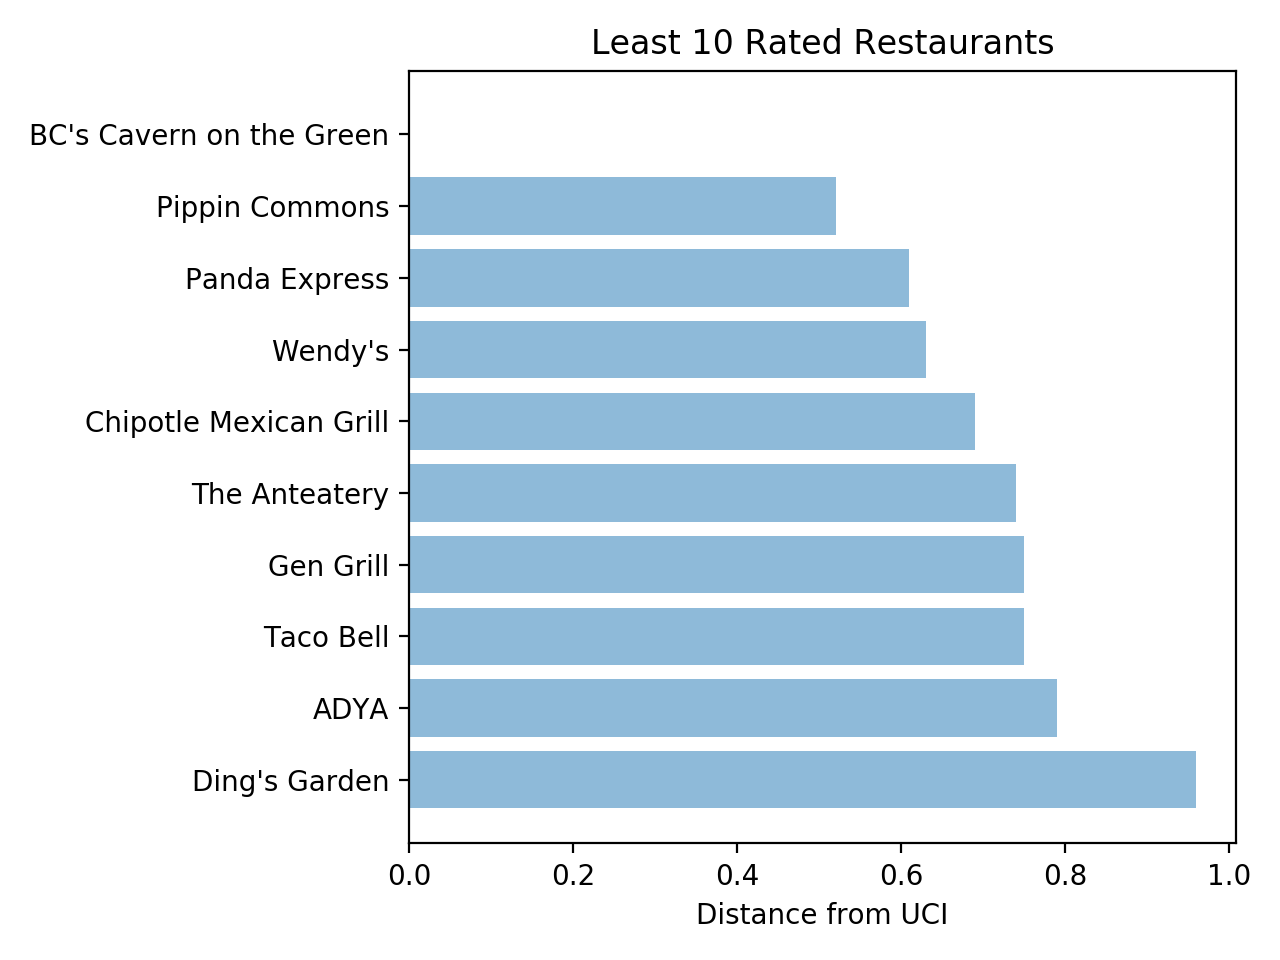

In [7]:
#Barplot prep
#top_rated.plot(kind='bar',x='name',y='distance miles')

least_rated_dist_srt = least_rated.sort_values('distance miles', ascending=False)
miledist = least_rated_dist_srt["distance miles"].values
name = least_rated_dist_srt["name"].values

y_pos = np.arange(len(name))
 
plt.barh(y_pos, miledist, align='center', alpha=0.5)
plt.yticks(y_pos, name)
plt.xlabel('Distance from UCI')
plt.title('Least 10 Rated Restaurants')
plt.tight_layout()

 
plt.savefig("Least rated 10 Restaurants.png")
plt.show()